In [54]:
import requests as req
import json
import pandas as pd
import time
import os
import matplotlib.pyplot as plt


In [27]:
# Get the API key from the environment
BLS_API_KEY = os.environ.get('BLS_API_KEY')
user_email = 'franktsibu@gmail.com'
print(BLS_API_KEY)

77fcc0e0e450426db6aff0c8303e6054


In [28]:
headers = {'Content-type':'application/json'}
data = json.dumps({
    'user-id': user_email,
    'registrationkey': BLS_API_KEY,
    'seriesid':['LNS14000000'], 
    'startyear':'2014', 
    'endyear':'2024'}
    )
resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/',data=data, headers=headers)
json_data = json.loads(resp.text)
print(json_data)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 188, 'message': [], 'Results': {'series': [{'seriesID': 'LNS14000000', 'data': [{'year': '2024', 'period': 'M12', 'periodName': 'December', 'latest': 'true', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M11', 'periodName': 'November', 'value': '4.2', 'footnotes': [{}]}, {'year': '2024', 'period': 'M10', 'periodName': 'October', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M09', 'periodName': 'September', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M08', 'periodName': 'August', 'value': '4.2', 'footnotes': [{}]}, {'year': '2024', 'period': 'M07', 'periodName': 'July', 'value': '4.2', 'footnotes': [{}]}, {'year': '2024', 'period': 'M06', 'periodName': 'June', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M05', 'periodName': 'May', 'value': '4.0', 'footnotes': [{}]}, {'year': '2024', 'period': 'M04', 'periodName': 'April', 'value': '3.9', 'footnotes': [{}]}, {'year':

In [29]:
unemp_national_dataset = []
for series in json_data['Results']['series']:
    for entry in series['data']:
        unemp_national_dataset.append(
            {
            'year': entry['year'],
            'month': entry['periodName'],
            'value': entry['value']
            }
        )
print(unemp_national_dataset)

[{'year': '2024', 'month': 'December', 'value': '4.1'}, {'year': '2024', 'month': 'November', 'value': '4.2'}, {'year': '2024', 'month': 'October', 'value': '4.1'}, {'year': '2024', 'month': 'September', 'value': '4.1'}, {'year': '2024', 'month': 'August', 'value': '4.2'}, {'year': '2024', 'month': 'July', 'value': '4.2'}, {'year': '2024', 'month': 'June', 'value': '4.1'}, {'year': '2024', 'month': 'May', 'value': '4.0'}, {'year': '2024', 'month': 'April', 'value': '3.9'}, {'year': '2024', 'month': 'March', 'value': '3.9'}, {'year': '2024', 'month': 'February', 'value': '3.9'}, {'year': '2024', 'month': 'January', 'value': '3.7'}, {'year': '2023', 'month': 'December', 'value': '3.8'}, {'year': '2023', 'month': 'November', 'value': '3.7'}, {'year': '2023', 'month': 'October', 'value': '3.9'}, {'year': '2023', 'month': 'September', 'value': '3.8'}, {'year': '2023', 'month': 'August', 'value': '3.7'}, {'year': '2023', 'month': 'July', 'value': '3.5'}, {'year': '2023', 'month': 'June', 'va

In [31]:
unemp_df = pd.DataFrame(unemp_national_dataset)
unemp_df['value'] = pd.to_numeric(unemp_df['value'])
print(unemp_df)

     year      month  value
0    2024   December    4.1
1    2024   November    4.2
2    2024    October    4.1
3    2024  September    4.1
4    2024     August    4.2
..    ...        ...    ...
127  2014        May    6.3
128  2014      April    6.2
129  2014      March    6.7
130  2014   February    6.7
131  2014    January    6.6

[132 rows x 3 columns]


<Axes: xlabel='month'>

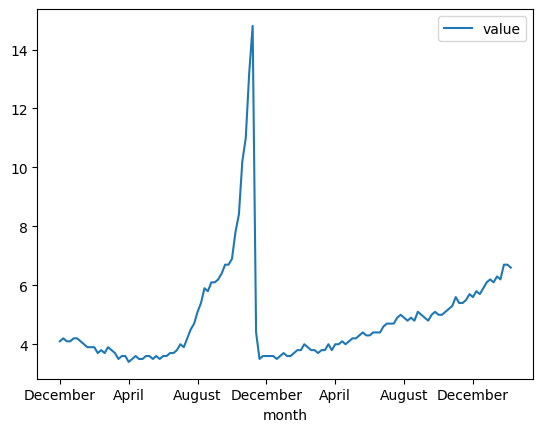

In [32]:
#plot the data
unemp_df.plot(x='month', y='value', kind='line')

In [68]:
#fetch data for a all 50 states wait for 5 seconds between each request
headers = {'Content-type':'application/json'}
fips_codes = ['1', '2','4','5','6','8','9','10','11','12','13','15','16','17',
               '18','19','20','21','22','23','24','25','26','27','28','29','30',
               '31','32','33','34','35','36','37','38','39','40','41','42','44',
               '45','46','47','48','49','50','51','53','54','55','56']
series_id = [f'LASST{state_cd}0000000000003' for state_cd in fips_codes]

data = json.dumps({
    'user-id': user_email,
    'registrationkey': BLS_API_KEY,
    'seriesid':series_id, 
    'startyear':'2014', 
    'endyear':'2024'
    })
resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(resp.text)
unemp_state_dataset = []
# create an empty list for seriesID, year, periodName, and value for each state

for series in json_data['Results']['series']:
    state = series['seriesID']
    for entry in series['data']:
        unemp_state_dataset.append(
            {
            'state': state,
            'year': entry['year'],
            'month': entry['periodName'],
            'value': entry['value']
            }
        )
print(unemp_state_dataset)


[{'state': 'LASST100000000000003', 'year': '2024', 'month': 'November', 'value': '3.9'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'October', 'value': '4.0'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'September', 'value': '4.2'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'August', 'value': '4.2'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'July', 'value': '4.1'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'June', 'value': '4.0'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'May', 'value': '3.9'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'April', 'value': '3.9'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'March', 'value': '3.9'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'February', 'value': '4.0'}, {'state': 'LASST100000000000003', 'year': '2024', 'month': 'January', 'value': '4.1'}, {'state': 'LASST100000000000003', 'year': '2023', 'mo

In [85]:
#create a dataframe from umployment data and convert the value column to numeric and group by state aggregate th
unemp_state_df = pd.DataFrame(unemp_state_dataset)
unemp_state_df['value'] = pd.to_numeric(unemp_state_df['value'])
unemp_state_df = unemp_state_df.rename(columns={'value': 'unemployment_rate'})
display(unemp_state_df)
grouped = unemp_state_df.groupby('state')
unemp_state_grp = grouped.apply(lambda x: x[['year', 'month', 'unemployment_rate']].to_dict('records')).reset_index()
unemp_state_grp.columns = ['state', 'data']
display(unemp_state_grp)


,state,year,month,unemployment_rate
0,LASST100000000000003,2024,November,3.9
1,LASST100000000000003,2024,October,4.0
2,LASST100000000000003,2024,September,4.2
3,LASST100000000000003,2024,August,4.2
4,LASST100000000000003,2024,July,4.1
...,...,...,...,...
5628,LASST550000000000003,2014,May,5.5
5629,LASST550000000000003,2014,April,5.6
5630,LASST550000000000003,2014,March,5.7
5631,LASST550000000000003,2014,February,5.9


/var/folders/p9/3xmcp6zj0kd4zcddwh2c327w0000gn/T/ipykernel_63314/1562151371.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unemp_state_grp = grouped.apply(lambda x: x[['year', 'month', 'unemployment_rate']].to_dict('records')).reset_index()


,state,data
0,LASST100000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
1,LASST110000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
2,LASST120000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
3,LASST130000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
4,LASST150000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
5,LASST160000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
6,LASST170000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
7,LASST180000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
8,LASST190000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."
9,LASST200000000000003,"[{'year': '2024', 'month': 'November', 'unempl..."


/var/folders/p9/3xmcp6zj0kd4zcddwh2c327w0000gn/T/ipykernel_63314/3849062824.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unemp_state_df["date"] = pd.to_datetime(unemp_state_df["year"].astype(str) + " " + unemp_state_df["month"])


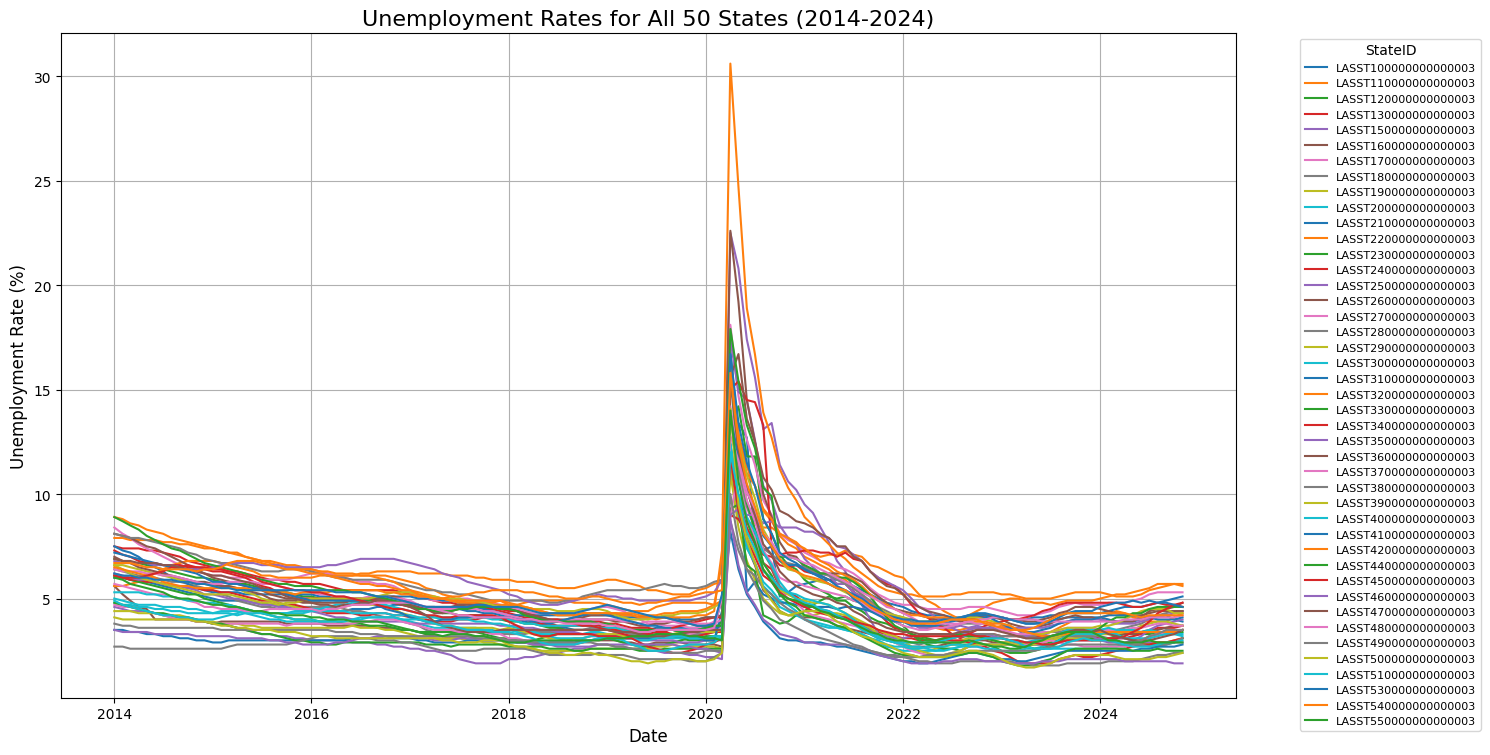

In [78]:
agg_df = unemp_state_df.groupby('state')['unemployment_rate'].apply(list).reset_index()
# Convert the month names to datetime for proper plotting
unemp_state_df["date"] = pd.to_datetime(unemp_state_df["year"].astype(str) + " " + unemp_state_df["month"])

# Plot each seriesID separately
plt.figure(figsize=(15, 8))

for state_id in unemp_state_grp["state"].unique():
    state_data = unemp_state_df[unemp_state_df["state"] == state_id]
    plt.plot(state_data["date"], state_data["unemployment_rate"], label=state_id)

# Customize the plot
plt.title("Unemployment Rates for All 50 States (2014-2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.legend(title="StateID", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
headers = {'Content-type':'application/json'}
industries = {
    'Construction': 'CES2000000001',
    'Manufacturing': 'CES3000000001',
    'Retail Trade': 'CES4200000001',
    'Healthcare': 'CES6562000001',
    'Information': 'CES5000000001'
}
data = json.dumps({
    'user-id': user_email,
    'registrationkey': BLS_API_KEY,
    'seriesid':list(industries.values()), 
    'startyear':'2014', 
    'endyear':'2024'
    })
resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/',data=data, headers=headers)
json_data = json.loads(resp.text)
indust_dataset = []
for series in json_data['Results']['series']:
    industry_name = [key for key, value in industries.items() if value == series["seriesID"]][0]
    for item in series["data"]:
        year = int(item["year"])
        month = item["periodName"]
        unemployment_rate = float(item["value"])
        indust_dataset.append({
            "industry": industry_name,
            "year": year,
            "month": month,
            "unemployment_rate": unemployment_rate
        })
print(indust_dataset)

LASST560000000000003
[{'industry': 'Construction', 'year': 2024, 'month': 'December', 'unemployment_rate': 8316.0}, {'industry': 'Construction', 'year': 2024, 'month': 'November', 'unemployment_rate': 8308.0}, {'industry': 'Construction', 'year': 2024, 'month': 'October', 'unemployment_rate': 8300.0}, {'industry': 'Construction', 'year': 2024, 'month': 'September', 'unemployment_rate': 8301.0}, {'industry': 'Construction', 'year': 2024, 'month': 'August', 'unemployment_rate': 8275.0}, {'industry': 'Construction', 'year': 2024, 'month': 'July', 'unemployment_rate': 8247.0}, {'industry': 'Construction', 'year': 2024, 'month': 'June', 'unemployment_rate': 8233.0}, {'industry': 'Construction', 'year': 2024, 'month': 'May', 'unemployment_rate': 8215.0}, {'industry': 'Construction', 'year': 2024, 'month': 'April', 'unemployment_rate': 8202.0}, {'industry': 'Construction', 'year': 2024, 'month': 'March', 'unemployment_rate': 8207.0}, {'industry': 'Construction', 'year': 2024, 'month': 'Februa

In [84]:
# create a dataframe from the data and convert the year and month columns to numeric
indust_df = pd.DataFrame(indust_dataset)
indust_df['unemployment_rate'] = pd.to_numeric(indust_df['unemployment_rate'])
indust_df["date"] = pd.to_datetime(indust_df["year"].astype(str) + " " + indust_df["month"])
display(indust_df)


/var/folders/p9/3xmcp6zj0kd4zcddwh2c327w0000gn/T/ipykernel_63314/3704269859.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  indust_df["date"] = pd.to_datetime(indust_df["year"].astype(str) + " " + indust_df["month"])


,industry,year,month,unemployment_rate,date
0,Construction,2024,December,8316.0,2024-12-01
1,Construction,2024,November,8308.0,2024-11-01
2,Construction,2024,October,8300.0,2024-10-01
3,Construction,2024,September,8301.0,2024-09-01
4,Construction,2024,August,8275.0,2024-08-01
...,...,...,...,...,...
655,Information,2014,May,2717.0,2014-05-01
656,Information,2014,April,2721.0,2014-04-01
657,Information,2014,March,2725.0,2014-03-01
658,Information,2014,February,2718.0,2014-02-01


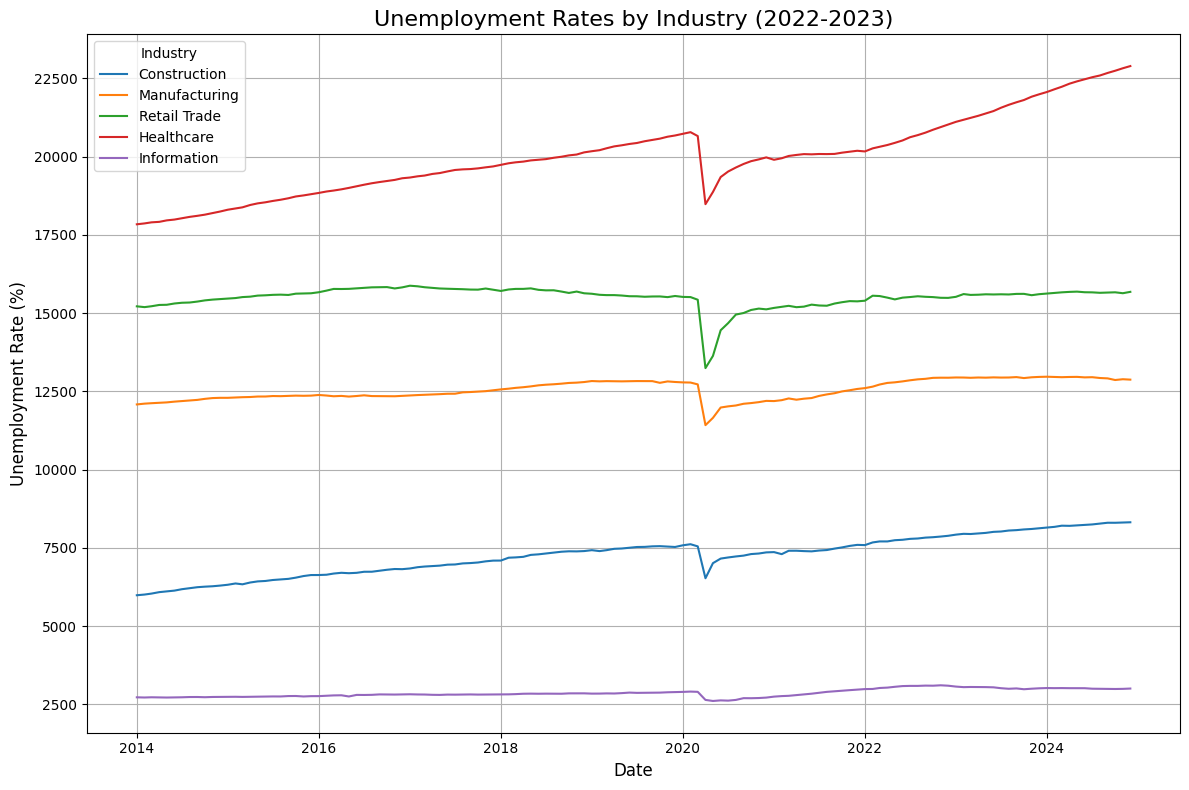

In [ ]:
# Plot the unemployment rates by industry
plt.figure(figsize=(12, 8))
for industry in indust_df["industry"].unique():
    industry_data = indust_df[indust_df["industry"] == industry]
    plt.plot(industry_data["date"], industry_data["unemployment_rate"], label=industry)

# Customize the plot
plt.title("Unemployment Rates by Industry (2014-2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.legend(title="Industry", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
headers = {'Content-type':'application/json'}
education_levels = {
    'Less than High School': 'LNS14027660',
    'High School Graduates': 'LNS14027689',
    'Some College or Associate Degree': 'LNS14027697',
    "Bachelor's Degree or Higher": 'LNS14027662',
}
data = json.dumps({
    'user-id': user_email,
    'registrationkey': BLS_API_KEY,
    'seriesid':list(education_levels.values()), 
    'startyear':'2014', 
    'endyear':'2024'
    })
resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/',data=data, headers=headers)
json_data = json.loads(resp.text)
ed_level_dataset = []
for series in json_data['Results']['series']:
    education_levels_name = [key for key, value in education_levels.items() if value == series["seriesID"]][0]
    for item in series["data"]:
        year = int(item["year"])
        month = item["periodName"]
        unemployment_rate = float(item["value"])
        ed_level_dataset.append({
            "education_level": education_levels_name,
            "year": year,
            "month": month,
            "unemployment_rate": unemployment_rate
        })
print(ed_level_dataset)

[{'education_level': 'Less than High School', 'year': 2024, 'month': 'December', 'unemployment_rate': 4.3}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'November', 'unemployment_rate': 4.6}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'October', 'unemployment_rate': 4.0}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'September', 'unemployment_rate': 4.0}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'August', 'unemployment_rate': 4.0}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'July', 'unemployment_rate': 4.6}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'June', 'unemployment_rate': 4.2}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'May', 'unemployment_rate': 4.3}, {'education_level': 'Less than High School', 'year': 2024, 'month': 'April', 'unemployment_rate': 4.0}, {'education_level': 'Less than High School', 'year': 2

In [83]:
# Create a DataFrame
ed_level_df = pd.DataFrame(ed_level_dataset)

# Convert to datetime
ed_level_df["date"] = pd.to_datetime(ed_level_df["year"].astype(str) + " " + ed_level_df["month"])
display(ed_level_df)

/var/folders/p9/3xmcp6zj0kd4zcddwh2c327w0000gn/T/ipykernel_63314/2741399893.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ed_level_df["date"] = pd.to_datetime(ed_level_df["year"].astype(str) + " " + ed_level_df["month"])


,education_level,year,month,unemployment_rate,date
0,Less than High School,2024,December,4.3,2024-12-01
1,Less than High School,2024,November,4.6,2024-11-01
2,Less than High School,2024,October,4.0,2024-10-01
3,Less than High School,2024,September,4.0,2024-09-01
4,Less than High School,2024,August,4.0,2024-08-01
...,...,...,...,...,...
391,Bachelor's Degree or Higher,2014,May,3.2,2014-05-01
392,Bachelor's Degree or Higher,2014,April,3.3,2014-04-01
393,Bachelor's Degree or Higher,2014,March,3.4,2014-03-01
394,Bachelor's Degree or Higher,2014,February,3.4,2014-02-01


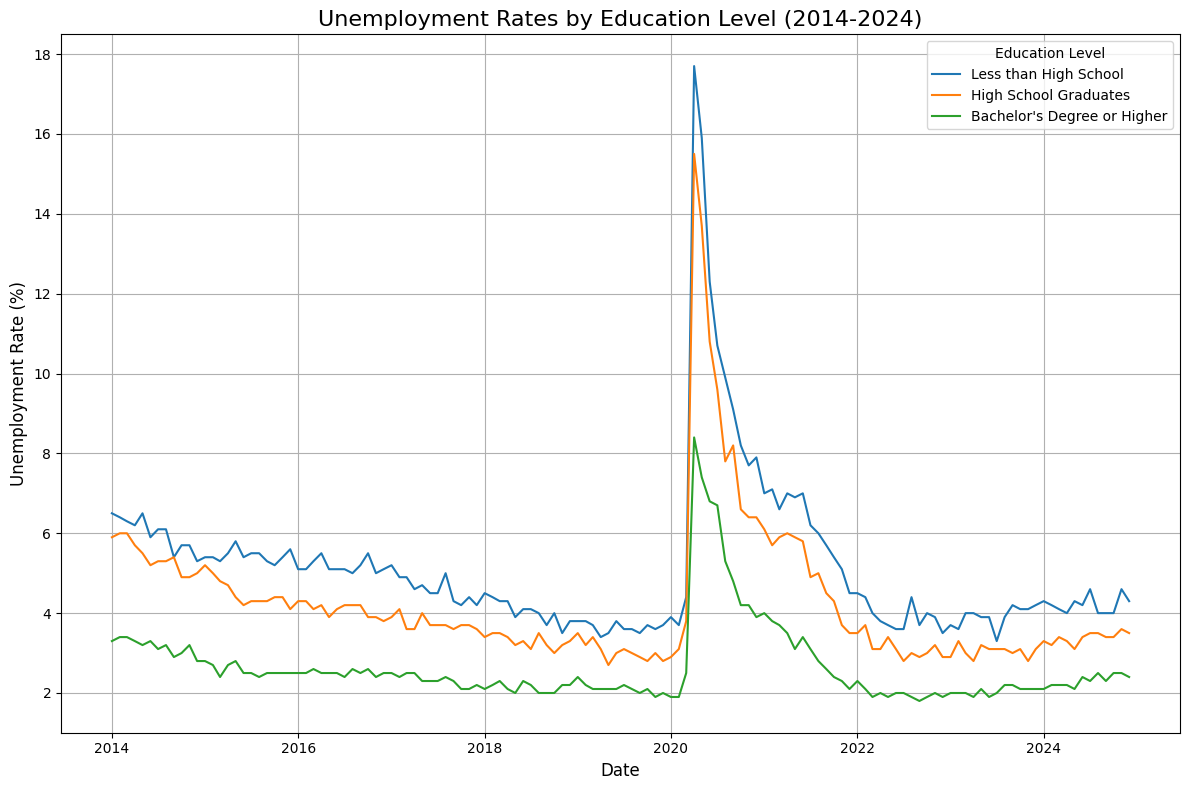

In [82]:
 # Plot the data
plt.figure(figsize=(12, 8))
for level in ed_level_df["education_level"].unique():
    level_data = ed_level_df[ed_level_df["education_level"] == level]
    plt.plot(level_data["date"], level_data["unemployment_rate"], label=level)

# Customize the plot
plt.title("Unemployment Rates by Education Level (2014-2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.legend(title="Education Level", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
headers = {'Content-type':'application/json'}
race_series = {
    'White': 'LNS14000003',
    'Black or African American': 'LNS14000006',
    'Hispanic or Latino': 'LNS14000009',
    'Asian': 'LNU04032183'
}
data = json.dumps({
    'user-id': user_email,
    'registrationkey': BLS_API_KEY,
    'seriesid':list(race_series.values()), 
    'startyear':'2014', 
    'endyear':'2024'
    })
resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/',data=data, headers=headers)
json_data = json.loads(resp.text)
print(json_data)
race_dataset = []
for series in json_data['Results']['series']:
    race = [key for key, value in race_series.items() if value == series["seriesID"]][0]
    for item in series["data"]:
        year = int(item["year"])
        month = item["periodName"]
        unemployment_rate = float(item["value"])
        race_dataset.append({
            "race": race,
            "year": year,
            "month": month,
            "unemployment_rate": unemployment_rate
        })
print(race_dataset)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 354, 'message': [], 'Results': {'series': [{'seriesID': 'LNS14000003', 'data': [{'year': '2024', 'period': 'M12', 'periodName': 'December', 'latest': 'true', 'value': '3.6', 'footnotes': [{}]}, {'year': '2024', 'period': 'M11', 'periodName': 'November', 'value': '3.8', 'footnotes': [{}]}, {'year': '2024', 'period': 'M10', 'periodName': 'October', 'value': '3.8', 'footnotes': [{}]}, {'year': '2024', 'period': 'M09', 'periodName': 'September', 'value': '3.7', 'footnotes': [{}]}, {'year': '2024', 'period': 'M08', 'periodName': 'August', 'value': '3.8', 'footnotes': [{}]}, {'year': '2024', 'period': 'M07', 'periodName': 'July', 'value': '3.8', 'footnotes': [{}]}, {'year': '2024', 'period': 'M06', 'periodName': 'June', 'value': '3.5', 'footnotes': [{}]}, {'year': '2024', 'period': 'M05', 'periodName': 'May', 'value': '3.5', 'footnotes': [{}]}, {'year': '2024', 'period': 'M04', 'periodName': 'April', 'value': '3.5', 'footnotes': [{}]}, {'year':

In [92]:
# Create a DataFrame
race_df = pd.DataFrame(race_dataset)

# Convert to datetime
race_df["date"] = pd.to_datetime(race_df["year"].astype(str) + " " + race_df["month"])
display(race_df)

/var/folders/p9/3xmcp6zj0kd4zcddwh2c327w0000gn/T/ipykernel_63314/3122636842.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  race_df["date"] = pd.to_datetime(race_df["year"].astype(str) + " " + race_df["month"])


,race,year,month,unemployment_rate,date
0,White,2024,December,3.6,2024-12-01
1,White,2024,November,3.8,2024-11-01
2,White,2024,October,3.8,2024-10-01
3,White,2024,September,3.7,2024-09-01
4,White,2024,August,3.8,2024-08-01
...,...,...,...,...,...
523,Asian,2014,May,5.3,2014-05-01
524,Asian,2014,April,5.7,2014-04-01
525,Asian,2014,March,5.4,2014-03-01
526,Asian,2014,February,6.0,2014-02-01


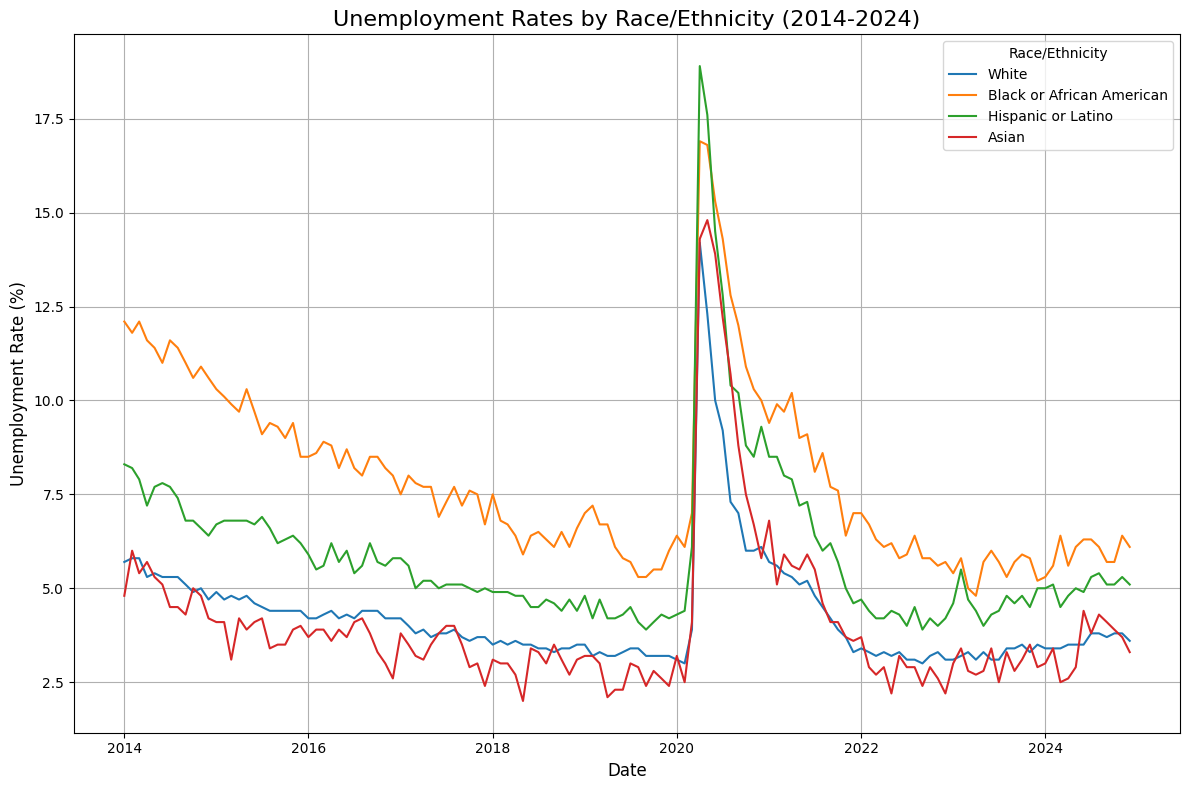

In [93]:
 # Plot the data
plt.figure(figsize=(12, 8))
for race in race_df["race"].unique():
    race_data = race_df[race_df["race"] == race]
    plt.plot(race_data["date"], race_data["unemployment_rate"], label=race)

# Customize the plot
plt.title("Unemployment Rates by Race/Ethnicity (2014-2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.legend(title="Race/Ethnicity", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()